In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scipy.stats
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.util import ngrams
from nltk.probability import FreqDist
import contractions
import re
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

In [2]:
data = pd.read_excel("kuisioner_new.xlsx")
df = data.iloc[:, :10]
df = df.rename(columns={"Dimana anda biasa menggunakan sosial media": "Lokasi"})
df = df.rename(columns={"Aplikasi media sosial apa yang sering anda gunakan dalam sehari": "Aplikasi"})
df = df.rename(columns={"Dengan apa anda mengakses sosial media": "Media"})

In [3]:
file_path = 'kuisioner_new.xlsx'
sheet = 'data kuisioner uji'
data2 = pd.read_excel(file_path, sheet_name=sheet)
data2.columns

Index(['MD1', 'MD2', 'MD3', 'MD4', 'sumMD', 'GH1', 'GH2', 'GH3', 'GH4', 'GH5',
       'GH6', 'GH7', 'sumGH', 'KM1', 'KM2', 'KM3', 'KM4', 'KM5', 'KM6', 'KM7',
       'KM8', 'KM9', 'KM10', 'sumKM', 'PP1', 'PP2', 'PP3', 'PP4', 'PP5',
       'sumPP'],
      dtype='object')

In [4]:
data2.shape

(57, 30)

In [5]:
missing = data2.isnull().sum()
print(missing)

MD1      0
MD2      0
MD3      0
MD4      0
sumMD    0
GH1      0
GH2      0
GH3      0
GH4      0
GH5      0
GH6      0
GH7      0
sumGH    0
KM1      0
KM2      0
KM3      0
KM4      0
KM5      0
KM6      0
KM7      0
KM8      0
KM9      0
KM10     0
sumKM    0
PP1      0
PP2      0
PP3      0
PP4      0
PP5      0
sumPP    0
dtype: int64


# Melakukan Statisika Deskriptif

In [6]:
contingency_table = pd.crosstab(index=df['Jenis Kelamin'], 
                                columns=[df['Lokasi'], df['Aplikasi'], df['Media']],
                                margins=True, margins_name="Total")

contingency_table =pd.DataFrame(contingency_table)
contingency_table=contingency_table.transpose()

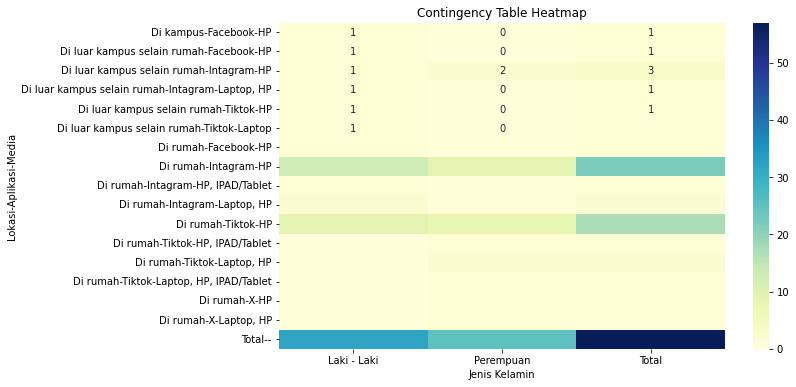

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=True)
plt.title("Contingency Table Heatmap")
plt.show()

Kesimpulan yang dapat diambil dari tabel ini adalah:

- Facebook adalah aplikasi media sosial yang paling populer di antara laki-laki, terutama dengan HP.
- Instagram dan Tiktok adalah aplikasi media sosial yang paling populer di antara perempuan, terutama di rumah dengan HP.
- Facebook adalah aplikasi media sosial yang kurang populer pada perempuan, tetapi perempuan lebih banyak menggunakan X di rumah dengan Laptop atau HP.
- Mahasiswa agroteknologi menggunakan media sosial di kampus sangat rendah, mungkin karena koneksi internet yang buruk, aturan kampus yang ketat, atau tuntutan akademik yang tinggi.

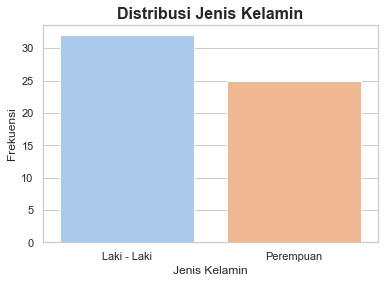

In [152]:
sns.set(style="whitegrid")
sns.countplot(x='Jenis Kelamin', data=df, palette='pastel')

plt.title('Distribusi Jenis Kelamin', fontsize=16, fontweight='bold')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Frekuensi')

plt.show()

 Diagram diatas menunjukkan bahwa ada lebih banyak laki-laki (sekitar 30 individu) dibandingkan perempuan (sekitar 25 individu) dalam data yang direpresentasikan oleh grafik.

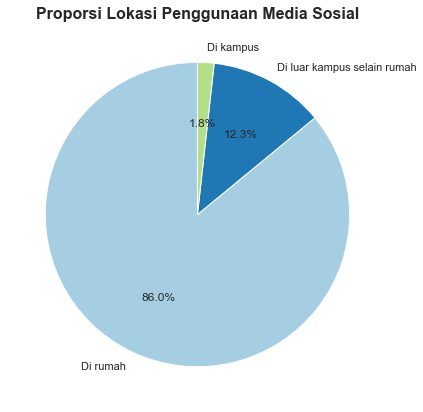

In [158]:
categories = df['Lokasi'].value_counts().index.tolist()
values = df['Lokasi'].value_counts().tolist()

plt.figure(figsize=(7, 7))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Proporsi Lokasi Penggunaan Media Sosial", fontsize=16, fontweight='bold')

plt.show()

Diagram diatas menunjukkan bahwa sebagian besar pengguna media sosial (86,0%) mengaksesnya di rumah, sedangkan sebagian kecil (12,3%) mengaksesnya di luar kampus selain rumah, dan sangat sedikit (1,8%) mengaksesnya di kampus.

Kesimpulan yang dapat diambil dari grafik diatas adalah:

- Mahasiswa agrotegnologi lebih suka mengaksesnya di tempat yang nyaman dan pribadi, seperti rumah, daripada di tempat yang ramai dan publik, seperti kampus.
- Mahasiswa agrotegnologi memiliki keterbatasan atau kendala untuk mengaksesnya di kampus, seperti koneksi internet yang buruk, aturan kampus yang ketat, atau tuntutan akademik yang tinggi.
- Mahasiswa agrotegnologi memiliki kebutuhan atau motivasi untuk mengaksesnya di luar kampus selain rumah, seperti untuk bersosialisasi, menghibur diri, atau mencari informasi.

# Uji Validitas

In [12]:
import math
#MD
df1=data2.loc[:,'MD1':'sumMD']
df1.tail()

,MD1,MD2,MD3,MD4,sumMD
52,2,2,2,4,10
53,2,2,2,3,9
54,2,3,3,3,11
55,1,2,1,4,8
56,3,3,3,3,12


In [13]:
corr_matrix = df1.corr()
corr_matrix

,MD1,MD2,MD3,MD4,sumMD
MD1,1.000000,0.016937,0.218066,0.003996,0.515289
MD2,0.016937,1.000000,0.624824,0.027288,0.695075
MD3,0.218066,0.624824,1.000000,-0.061232,0.739673
MD4,0.003996,0.027288,-0.061232,1.000000,0.428375
sumMD,0.515289,0.695075,0.739673,0.428375,1.000000


In [14]:
# Menghapus kolom MD1 DAN MD4 dan melakukan uji validitas kembali
df1_dropMD4 = df1.drop(['MD4'],axis=1)
corr_matrix = df1_dropMD4.corr()
corr_matrix

,MD1,MD2,MD3,sumMD
MD1,1.000000,0.016937,0.218066,0.515289
MD2,0.016937,1.000000,0.624824,0.695075
MD3,0.218066,0.624824,1.000000,0.739673
sumMD,0.515289,0.695075,0.739673,1.000000


In [15]:
#GH
df2=data2.loc[:,'GH1':'sumGH']
df2.tail()

,GH1,GH2,GH3,GH4,GH5,GH6,GH7,sumGH
52,3,3,3,2,3,3,2,19
53,4,3,2,2,3,4,1,19
54,1,1,1,1,1,1,1,7
55,1,1,1,1,1,1,1,7
56,3,3,3,3,4,2,4,22


In [16]:
corr_matrix = df2.corr()
corr_matrix

,GH1,GH2,GH3,GH4,GH5,GH6,GH7,sumGH
GH1,1.000000,0.634925,0.382412,0.451666,0.433280,0.308356,0.086667,0.670647
GH2,0.634925,1.000000,0.403523,0.438727,0.562750,0.333132,0.395426,0.772851
GH3,0.382412,0.403523,1.000000,0.540252,0.457292,0.384773,0.481330,0.744957
GH4,0.451666,0.438727,0.540252,1.000000,0.572335,0.240412,0.380234,0.743720
GH5,0.433280,0.562750,0.457292,0.572335,1.000000,0.225073,0.412038,0.764093
GH6,0.308356,0.333132,0.384773,0.240412,0.225073,1.000000,0.202073,0.565701
GH7,0.086667,0.395426,0.481330,0.380234,0.412038,0.202073,1.000000,0.599405
sumGH,0.670647,0.772851,0.744957,0.743720,0.764093,0.565701,0.599405,1.000000


In [17]:
#KM
df3=data2.loc[:,'KM1':'sumKM']
df3.tail()

,KM1,KM2,KM3,KM4,KM5,KM6,KM7,KM8,KM9,KM10,sumKM
52,4,4,3,4,3,3,3,3,3,3,33
53,4,4,4,3,2,3,4,3,2,2,31
54,3,3,3,3,3,3,3,4,2,3,30
55,4,2,3,2,3,4,4,4,2,4,32
56,3,3,3,3,3,3,3,2,4,2,29


In [18]:
corr_matrix = df3.corr()
corr_matrix

,KM1,KM2,KM3,KM4,KM5,KM6,KM7,KM8,KM9,KM10,sumKM
KM1,1.000000,0.385834,0.456597,0.530953,0.476205,0.509125,0.534472,0.282628,0.219920,0.105835,0.742831
KM2,0.385834,1.000000,0.262288,0.321798,0.266721,0.204724,0.287959,-0.071074,0.200253,-0.184701,0.447159
KM3,0.456597,0.262288,1.000000,0.595464,0.663499,0.501168,0.425536,0.363888,0.092442,0.055936,0.736365
KM4,0.530953,0.321798,0.595464,1.000000,0.641370,0.689202,0.423696,0.280459,0.302212,0.138736,0.814852
KM5,0.476205,0.266721,0.663499,0.641370,1.000000,0.747287,0.517345,0.126475,0.216549,0.036490,0.774254
KM6,0.509125,0.204724,0.501168,0.689202,0.747287,1.000000,0.659974,0.158309,0.078057,0.092777,0.759822
KM7,0.534472,0.287959,0.425536,0.423696,0.517345,0.659974,1.000000,0.032077,-0.008607,-0.128907,0.611555
KM8,0.282628,-0.071074,0.363888,0.280459,0.126475,0.158309,0.032077,1.000000,-0.001858,0.440073,0.454043
KM9,0.219920,0.200253,0.092442,0.302212,0.216549,0.078057,-0.008607,-0.001858,1.000000,0.208468,0.388801
KM10,0.105835,-0.184701,0.055936,0.138736,0.036490,0.092777,-0.128907,0.440073,0.208468,1.000000,0.290192


In [19]:
# Menghapus kolom dan melakukan uji validitas kembali
df3_dropKM28910 = df3.drop(['KM2','KM8','KM9','KM10'],axis=1)
corr_matrix = df3_dropKM28910.corr()
corr_matrix

,KM1,KM3,KM4,KM5,KM6,KM7,sumKM
KM1,1.000000,0.456597,0.530953,0.476205,0.509125,0.534472,0.742831
KM3,0.456597,1.000000,0.595464,0.663499,0.501168,0.425536,0.736365
KM4,0.530953,0.595464,1.000000,0.641370,0.689202,0.423696,0.814852
KM5,0.476205,0.663499,0.641370,1.000000,0.747287,0.517345,0.774254
KM6,0.509125,0.501168,0.689202,0.747287,1.000000,0.659974,0.759822
KM7,0.534472,0.425536,0.423696,0.517345,0.659974,1.000000,0.611555
sumKM,0.742831,0.736365,0.814852,0.774254,0.759822,0.611555,1.000000


In [20]:
#PP
df4=data2.loc[:,'PP1':'sumPP']
df4.tail()

,PP1,PP2,PP3,PP4,PP5,sumPP
52,1,2,1,1,1,6
53,2,2,2,2,2,10
54,3,3,3,3,3,15
55,2,2,2,2,2,10
56,2,2,2,2,2,10


In [21]:
corr_matrix = df4.corr()
corr_matrix

,PP1,PP2,PP3,PP4,PP5,sumPP
PP1,1.000000,0.553893,0.563929,0.664106,0.528796,0.795164
PP2,0.553893,1.000000,0.732383,0.757407,0.402376,0.853901
PP3,0.563929,0.732383,1.000000,0.805761,0.331821,0.848351
PP4,0.664106,0.757407,0.805761,1.000000,0.396242,0.893660
PP5,0.528796,0.402376,0.331821,0.396242,1.000000,0.664890
sumPP,0.795164,0.853901,0.848351,0.893660,0.664890,1.000000


# Realbilitas

In [22]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [23]:
df1=df1_dropMD4.loc[:,'MD1':'MD3']
df2=data2.loc[:,'GH1':'GH7']
df3=df3_dropKM28910.loc[:,'KM1':'KM7']
df4=data2.loc[:,'PP1':'PP5']

In [24]:
cronbach_alpha(df1)

0.5465403901650159

In [25]:
cronbach_alpha(df2)

0.8214019027005075

In [26]:
cronbach_alpha(df3)

0.8834300531776742

In [27]:
cronbach_alpha(df4)

0.8706010947949505

In [28]:
dfa = pd.concat([df1, df2, df3, df4], axis=1)
dfa.head()

,MD1,MD2,MD3,GH1,GH2,GH3,GH4,GH5,GH6,GH7,...,KM3,KM4,KM5,KM6,KM7,PP1,PP2,PP3,PP4,PP5
0,2,2,2,3,3,2,1,3,1,2,...,3,4,3,4,4,2,2,2,2,2
1,2,1,1,2,2,1,2,2,1,1,...,3,3,3,3,3,2,2,2,2,2
2,2,2,2,2,2,1,2,3,2,2,...,3,3,2,3,3,2,2,2,2,2
3,1,2,1,3,3,1,1,2,2,1,...,4,4,4,4,4,2,2,2,2,2
4,2,2,2,2,2,1,2,2,2,2,...,4,4,4,4,3,1,2,2,1,2


# Analisis Faktor

In [29]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MD1     57 non-null     int64
 1   MD2     57 non-null     int64
 2   MD3     57 non-null     int64
 3   GH1     57 non-null     int64
 4   GH2     57 non-null     int64
 5   GH3     57 non-null     int64
 6   GH4     57 non-null     int64
 7   GH5     57 non-null     int64
 8   GH6     57 non-null     int64
 9   GH7     57 non-null     int64
 10  KM1     57 non-null     int64
 11  KM3     57 non-null     int64
 12  KM4     57 non-null     int64
 13  KM5     57 non-null     int64
 14  KM6     57 non-null     int64
 15  KM7     57 non-null     int64
 16  PP1     57 non-null     int64
 17  PP2     57 non-null     int64
 18  PP3     57 non-null     int64
 19  PP4     57 non-null     int64
 20  PP5     57 non-null     int64
dtypes: int64(21)
memory usage: 9.5 KB


In [30]:
dfa.corr()

,MD1,MD2,MD3,GH1,GH2,GH3,GH4,GH5,GH6,GH7,...,KM3,KM4,KM5,KM6,KM7,PP1,PP2,PP3,PP4,PP5
MD1,1.000000,0.016937,0.218066,0.206638,0.117351,0.161604,0.134151,0.262565,0.186394,0.031460,...,-0.033185,0.082547,-0.082136,-0.038853,-0.369882,0.094615,0.237483,0.062449,0.083206,-0.115163
MD2,0.016937,1.000000,0.624824,-0.035077,0.110051,0.187779,0.044082,0.136225,-0.026923,0.277046,...,-0.072175,-0.118032,-0.180063,-0.297661,-0.165830,0.077214,0.089975,0.031203,0.091993,0.028206
MD3,0.218066,0.624824,1.000000,0.052947,0.178608,0.223457,0.158814,0.156368,0.025275,0.202381,...,0.076076,-0.028837,0.025451,-0.129418,-0.089908,0.017334,0.112921,0.066076,0.058380,0.081798
GH1,0.206638,-0.035077,0.052947,1.000000,0.634925,0.382412,0.451666,0.433280,0.308356,0.086667,...,0.197712,0.258046,0.038216,0.206475,0.043126,-0.041408,0.085573,-0.044786,0.049808,-0.088414
GH2,0.117351,0.110051,0.178608,0.634925,1.000000,0.403523,0.438727,0.562750,0.333132,0.395426,...,0.317716,0.312250,0.227881,0.297974,0.214672,-0.227768,-0.236356,-0.151822,-0.122195,-0.213590
GH3,0.161604,0.187779,0.223457,0.382412,0.403523,1.000000,0.540252,0.457292,0.384773,0.481330,...,0.141971,0.219643,0.071156,0.103380,0.093986,0.012588,0.051453,-0.050502,0.042395,-0.021029
GH4,0.134151,0.044082,0.158814,0.451666,0.438727,0.540252,1.000000,0.572335,0.240412,0.380234,...,0.118591,0.188927,0.108418,0.155143,-0.070142,-0.074212,-0.041365,-0.103728,-0.048474,-0.157472
GH5,0.262565,0.136225,0.156368,0.433280,0.562750,0.457292,0.572335,1.000000,0.225073,0.412038,...,0.256581,0.191042,0.194641,0.184820,0.129147,-0.071657,0.063542,-0.063460,-0.077122,-0.084378
GH6,0.186394,-0.026923,0.025275,0.308356,0.333132,0.384773,0.240412,0.225073,1.000000,0.202073,...,0.241648,0.219975,0.119965,0.221829,0.012453,0.001228,-0.018819,0.007150,0.082699,0.003516
GH7,0.031460,0.277046,0.202381,0.086667,0.395426,0.481330,0.380234,0.412038,0.202073,1.000000,...,0.072466,0.076609,0.092183,-0.072116,-0.096488,-0.079028,-0.067298,-0.039206,-0.016430,0.012574


In [31]:
dfa.corr()[(data.corr()>0.9)
          &(data.corr()<1)]

,MD1,MD2,MD3,GH1,GH2,GH3,GH4,GH5,GH6,GH7,...,KM3,KM4,KM5,KM6,KM7,PP1,PP2,PP3,PP4,PP5
MD1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MD2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MD3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GH1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GH6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GH7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Asumsi

In [32]:
# Barlett's

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(dfa)

(635.553556191933, 2.3463630996112925e-44)

nilai p-value sangat kecil (didekati nol), yaitu 2.3463630996112925e-44, sehingga kita dapat menyimpulkan bahwa terdapat bukti yang cukup kuat untuk menolak hipotesis nol. Oleh karena itu, kesimpulan dari hasil ini adalah bahwa terdapat perbedaan yang signifikan dalam varians antar kelompok data.

In [33]:
# KMO

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(dfa)
print(kmo_model)

0.6409228455923401


d:\Anaconda\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


### Komunalitas

In [34]:
fa = FactorAnalyzer() 
fa.fit(dfa)
# Mendapatkan communalities
communalities = fa.get_communalities()
communalities_df = pd.DataFrame(communalities, index=dfa.columns, columns=['Communalities'])
sorted_communalities_df = communalities_df.sort_values(by='Communalities', ascending=False)
sorted_communalities_df

,Communalities
PP4,0.815162
KM6,0.744835
PP2,0.741036
PP3,0.673984
KM5,0.647849
KM4,0.597369
GH2,0.579130
KM3,0.570548
PP1,0.532606
GH5,0.518607


In [35]:
drop_column = ['KM1','GH1','PP5','GH7','GH6','MD2','MD3','MD1']
dfa.drop(drop_column,axis=1,inplace = True)

fa = FactorAnalyzer() 
fa.fit(dfa)
# Mendapatkan communalities
communalities = fa.get_communalities()
communalities_df = pd.DataFrame(communalities, index=dfa.columns, columns=['Communalities'])
sorted_communalities_df = communalities_df.sort_values(by='Communalities', ascending=False)
sorted_communalities_df

,Communalities
PP4,0.867599
KM5,0.773378
KM6,0.765776
PP2,0.738406
PP3,0.721726
GH4,0.644899
GH5,0.574598
KM4,0.569217
KM3,0.503113
PP1,0.462721


In [36]:
drop_column = ['GH2','GH3']
dfa.drop(drop_column,axis=1,inplace = True)

fa = FactorAnalyzer() 
fa.fit(dfa)
# Mendapatkan communalities
communalities = fa.get_communalities()
communalities_df = pd.DataFrame(communalities, index=dfa.columns, columns=['Communalities'])
sorted_communalities_df = communalities_df.sort_values(by='Communalities', ascending=False)
sorted_communalities_df

,Communalities
PP4,0.870799
GH4,0.851590
KM6,0.749509
KM5,0.742025
PP3,0.733906
PP2,0.724622
KM4,0.568905
KM3,0.498501
KM7,0.489307
PP1,0.458139


In [37]:
drop_column = ['GH5']
dfa.drop(drop_column,axis=1,inplace = True)

fa = FactorAnalyzer() 
fa.fit(dfa)
# Mendapatkan communalities
communalities = fa.get_communalities()
communalities_df = pd.DataFrame(communalities, index=dfa.columns, columns=['Communalities'])
sorted_communalities_df = communalities_df.sort_values(by='Communalities', ascending=False)
sorted_communalities_df

,Communalities
KM7,1.021883
PP4,0.870280
PP2,0.859613
KM5,0.739184
PP3,0.733678
KM6,0.725691
KM4,0.703494
KM3,0.544034
PP1,0.476037
GH4,0.066422


In [38]:
drop_column = ['GH4']
dfa.drop(drop_column,axis=1,inplace = True)

fa = FactorAnalyzer() 
fa.fit(dfa)
# Mendapatkan communalities
communalities = fa.get_communalities()
communalities_df = pd.DataFrame(communalities, index=dfa.columns, columns=['Communalities'])
sorted_communalities_df = communalities_df.sort_values(by='Communalities', ascending=False)
sorted_communalities_df

,Communalities
PP4,0.897584
PP2,0.858637
KM5,0.715256
PP3,0.706824
KM4,0.689435
PP1,0.588072
KM7,0.572138
KM6,0.566929
KM3,0.505547


Dari hasil komunalitas di atas, terlihat bahwa semua nilai variabel nya berada di atas 0.5 (termasuk pembulatan) , sehingga tidak ada lagi variabel yang perlu dihapus dan data bisa dilanjutkan untuk dianalisis

### Eigenvalue

In [39]:
ev, v = fa.get_eigenvalues()
ev

array([3.53678764, 2.90973944, 0.79366758, 0.52243623, 0.39305546,
       0.31941143, 0.23112761, 0.16149165, 0.13228296])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


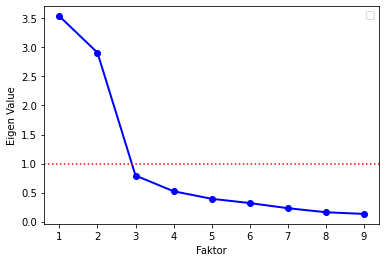

In [40]:
factor_values = np.arange(dfa.shape[1]) + 1

plt.plot(factor_values, ev, 'o-', color='blue', linewidth=2) 
plt.xlabel('Faktor')
plt.ylabel('Eigen Value')
plt.legend()
plt.axhline(y=1, color='red', linestyle=':')
plt.show()

### analisis faktor

In [41]:
fa = FactorAnalyzer(2, rotation='varimax')
fa.fit(dfa)
print(fa.loadings_)

[[ 7.03990538e-01  8.25378160e-02]
 [ 7.75673341e-01 -2.52300548e-04]
 [ 8.64850925e-01 -1.22436866e-01]
 [ 8.64661310e-01 -7.43973184e-02]
 [ 6.26082349e-01 -6.48378221e-02]
 [-1.00931287e-01  6.77103197e-01]
 [ 2.85648467e-02  8.34913680e-01]
 [-7.04985490e-02  8.56783935e-01]
 [-2.22427057e-02  9.33921607e-01]]


In [42]:
#loadings
load = pd.DataFrame(fa.loadings_, index = list(dfa.columns), columns = ['Factor 1', 'Factor 2'])
load

,Factor 1,Factor 2
KM3,0.703991,0.082538
KM4,0.775673,-0.000252
KM5,0.864851,-0.122437
KM6,0.864661,-0.074397
KM7,0.626082,-0.064838
PP1,-0.100931,0.677103
PP2,0.028565,0.834914
PP3,-0.070499,0.856784
PP4,-0.022243,0.933922


In [43]:
load.where(abs(load)>0.5)

,Factor 1,Factor 2
KM3,0.703991,NaN
KM4,0.775673,NaN
KM5,0.864851,NaN
KM6,0.864661,NaN
KM7,0.626082,NaN
PP1,NaN,0.677103
PP2,NaN,0.834914
PP3,NaN,0.856784
PP4,NaN,0.933922


Dari Hasil diatas menunjukan nilai loadings yang
dapat melihat variabel-variabel yang mempunyai
pengaruh paling signifikan terhadap faktor-faktor
tersebut. Hasil diatas hanya memuat variabel dengan
nilai loadings lebih besar dari 0,5. 

#### faktor 1 perundungan dan pelecehan online
    - perundungan dengan body shaming
    - perundungan dengan menyebar hoax dan aib
    - perundungan dengan saling ejek
    - perundungan karena hasutan menyebar kebencian
    - kasus pelecehan di medsos
#### faktor 2 respons dan kebijakan terhadap pelecehan di lingkungan akademik
    - perilaku di fakultas atau program studi 
    - kemampuan pimpinan menangani situasi pelecehan
    - keefektifan kebijakan anti pelecehan
    - respon pimpinan terhadap laporan pelecehan

kesimpulan, dua faktor ini mungkin mencerminkan dua aspek penting dari pengalaman individu dengan pelecehan. pengalaman mereka dengan perundungan dan pelecehan online (Faktor 1), dan bagaimana lingkungan akademik mereka merespons dan mencegah pelecehan (Faktor 2). Ini bisa menjadi dasar untuk penelitian lebih lanjut tentang bagaimana kedua faktor ini berinteraksi dan mempengaruhi kesejahteraan individu.

# Waktunya Analisis Sentimen

In [44]:
data = pd.read_excel("kuisioner_new.xlsx")

In [45]:
data.head()

,Timestamp,Email,Nama Lengkap,Umur,Jenis Kelamin,Jurusan,NPM,Aplikasi media sosial apa yang sering anda gunakan dalam sehari,Dimana anda biasa menggunakan sosial media,Dengan apa anda mengakses sosial media,...,Seberapa setuju anda bahwa kita sebaiknya istirahat ber media sosial setidaknya 1 hari dalam satu bulan,Seberapa setuju anda bahwa aktif dalam media sosial meningkatkan kepercayaan diri,Seberapa setuju anda bahwa aktif dalam media sosial dapat menyebabkan kesehatan mental terganggu,Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? setuju atau tidak setuju mohon diberikan alasannya,Seberapa baik atau buruk Anda merasa tentang perilaku tertentu di fakultas atau prodi Anda dalam satu bulan terakhir?,Bagaimana Anda menilai kemampuan pimpinan atau pengelola untuk menangani situasi pelecehan atau perundungan di lingkungan fakultas atau prodi anda?,Sejauh mana Anda merasa bahwa kebijakan anti-pelecehan di fakultas atau prodi Anda efektif dalam mencegah dan menangani situasi pelecehan?,Bagaimana Anda menilai respons pihak fakultas atau prodi terhadap laporan atau pengaduan mengenai pelecehan atau perundungan?,Bagaimana Anda menilai ketersediaan pelatihan atau workshop mengenai pelecehan dan perundungan di fakultas atau prodi Anda?,Bagaimana Anda merasa terkait dengan kebijakan anti-pelecehan di tempat kerja atau sekolah Anda? Apakah Anda percaya bahwa kebijakan tersebut cukup efektif dalam menciptakan lingkungan yang aman dan mendukung
0,2023-12-10 22:21:50.486,ridwanfajri400@gmail.com,Ridwan Fajri,19,Laki - Laki,Agroteknologi,22025010129,Intagram,Di rumah,HP,...,3,3,3,"saya setuju dengan pendapat tersebut, karena j...",2,2,2,2,2,sebagai manusia yang bermoral dan berakhlak te...
1,2023-12-11 09:47:40.685,22025010113@student.upnjatim.ac.id,Tegar Khoirul Ni'am,21,Laki - Laki,Agroteknologi,22025010113,Tiktok,Di rumah,HP,...,3,3,3,"Tidak setuju, dikarenakan di medsos ini tergan...",2,2,2,2,2,"Menurut saya kebijakan anti pelecahan, perundi..."
2,2023-12-11 10:10:26.019,2202510108@student.upnjatim.ac.id,Maulana Akbar,19,Laki - Laki,Pertanian,22025010108,Facebook,Di rumah,HP,...,4,2,3,Setuju karena medsos kita tidak pernah diketah...,2,2,2,2,2,Lebih baik ada tindakan yang tidak tertulis
3,2023-12-11 13:21:07.172,22025010130@student.upnjatim.ac.id,Evan Raditya Putra Ardana,19,Laki - Laki,Agroteknologi,22025010130,Intagram,Di rumah,HP,...,4,2,3,"setuju, karena biasanya perundungan yang ada d...",2,2,2,2,2,menurut saya cukup efektif karena kebanyakan k...
4,2023-12-11 14:16:26.144,Nabilasofia22@gmail.com,Nabila Sofia,23,Perempuan,Agroteknologi,18025010014,Intagram,Di rumah,HP,...,4,2,3,"Setuju, karena apabila kita mengunggah suatu p...",1,2,2,1,2,"Sebenarnya kurang efektif, namun dari kebijaka..."


In [46]:
data = data.loc[:, ['Apa pendapat anda mengenai kebijakan pemerintah yang telah menutup Tiktok Shop? Setuju atau tidak setuju mohon diberikan alasannya', 'Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? setuju atau tidak setuju mohon diberikan alasannya', 'Bagaimana Anda merasa terkait dengan kebijakan anti-pelecehan di tempat kerja atau sekolah Anda? Apakah Anda percaya bahwa kebijakan tersebut cukup efektif dalam menciptakan lingkungan yang aman dan mendukung']]
data

,Apa pendapat anda mengenai kebijakan pemerintah yang telah menutup Tiktok Shop? Setuju atau tidak setuju mohon diberikan alasannya,Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? setuju atau tidak setuju mohon diberikan alasannya,Bagaimana Anda merasa terkait dengan kebijakan anti-pelecehan di tempat kerja atau sekolah Anda? Apakah Anda percaya bahwa kebijakan tersebut cukup efektif dalam menciptakan lingkungan yang aman dan mendukung
0,"kurang setuju, karena menurut saya belanja di ...","saya setuju dengan pendapat tersebut, karena j...",sebagai manusia yang bermoral dan berakhlak te...
1,"Setuju, karena tiktok shop ini berpengaruh ke ...","Tidak setuju, dikarenakan di medsos ini tergan...","Menurut saya kebijakan anti pelecahan, perundi..."
2,Tidak setuju karena mungkin itu sumber penghas...,Setuju karena medsos kita tidak pernah diketah...,Lebih baik ada tindakan yang tidak tertulis
3,"tidak setuju, saya tidak setuju karena tiktok ...","setuju, karena biasanya perundungan yang ada d...",menurut saya cukup efektif karena kebanyakan k...
4,"Tidak setuju, karena dengan adanya tiktok shop...","Setuju, karena apabila kita mengunggah suatu p...","Sebenarnya kurang efektif, namun dari kebijaka..."
5,"Setuju, namun berilah batasan maksimal yang da...","Setuju, semuanya tergantung pemikiran masing m...",Masih kurang jika hukumannya hanya sekedar ber...
6,"Setuju, karena biasanya di online store kebany...","Setuju, karena dengan melihat dan membaca capt...",Saya rasa cukup efektif karena bisa mawas diri
7,"Kurang setuju, karena adanya kebijakan tersebu...","Kuranv setuju, karena lewat media sosial dapat...","Cukup efektif, karena dapat menciptakan suasan..."
8,"Tidak masalah. Beberapa tahun lalu, sebelum ad...","Setuju, lingkungan media sosial dapat menjadi ...",kebijakan anti-pelecehan di tempat kerja atau ...
9,"Tidak setuju,sebagai orang yang malas berpergi...","Setuju, karena adanya berita yg mungkin awalny...","Cukup efektif, karena adanya hal tersebut dapa..."


In [47]:
drop_kolom = [20, 21, 43, 53, 54]

dfs = data.drop(drop_kolom)

In [48]:
dfs = dfs.copy()
dfs = dfs.rename(columns={"Apa pendapat anda mengenai kebijakan pemerintah yang telah menutup Tiktok Shop? Setuju atau tidak setuju mohon diberikan alasannya": "Penutupan TiktokShop"})
dfs = dfs.rename(columns={"Apa kamu setuju bahwa lingkungan dalam media sosial yang sering anda gunakan saat ini sangat toxic dan dapat menggangu kesehatan mental anda ? setuju atau tidak setuju mohon diberikan alasannya": "Lingkungan Medsos Toxic"})
dfs = dfs.rename(columns={"Bagaimana Anda merasa terkait dengan kebijakan anti-pelecehan di tempat kerja atau sekolah Anda? Apakah Anda percaya bahwa kebijakan tersebut cukup efektif dalam menciptakan lingkungan yang aman dan mendukung": "Kebijakan anti-pelecehan"})
dfs.head()

,Penutupan TiktokShop,Lingkungan Medsos Toxic,Kebijakan anti-pelecehan
0,"kurang setuju, karena menurut saya belanja di ...","saya setuju dengan pendapat tersebut, karena j...",sebagai manusia yang bermoral dan berakhlak te...
1,"Setuju, karena tiktok shop ini berpengaruh ke ...","Tidak setuju, dikarenakan di medsos ini tergan...","Menurut saya kebijakan anti pelecahan, perundi..."
2,Tidak setuju karena mungkin itu sumber penghas...,Setuju karena medsos kita tidak pernah diketah...,Lebih baik ada tindakan yang tidak tertulis
3,"tidak setuju, saya tidak setuju karena tiktok ...","setuju, karena biasanya perundungan yang ada d...",menurut saya cukup efektif karena kebanyakan k...
4,"Tidak setuju, karena dengan adanya tiktok shop...","Setuju, karena apabila kita mengunggah suatu p...","Sebenarnya kurang efektif, namun dari kebijaka..."


In [49]:
missing_values = dfs.isnull().sum()
print(missing_values)

Penutupan TiktokShop        0
Lingkungan Medsos Toxic     0
Kebijakan anti-pelecehan    0
dtype: int64


# Analyze data tezt

### Normalization Phase

Menormalisasikan kata singkat dan tidak baku menjadi kata baku sesuai dengan KBBI. Saya mendapatkan dataset Slang nya melalui 

    From: https://drive.google.com/uc?id=1cXaOtuw6xqWL6KDjZqvkzGYsiyyr0X1y

In [59]:
slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

slangs = []
for item in clear_slangs:
  try:
    k, v = item # try to unpack the item into two variables
    slangs.append([k.strip(), v.strip()]) # if successful, append to the list
  except ValueError: # if not, catch the error
    print(f"Invalid line: {item}") # print the invalid line
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'ampe': 'sampai',
 'almt': 'alamat',
 'almat': 'alamat',
 'alamt': 'alamat',
 'almtnya': 'alamatnya',
 'apknya': 'aplikasinya',
 'antri': 'antre',
 'adl': 'adalah',
 'awalnnya': 'awalnya',
 'asem': 'asam',
 'alumunium': 'aluminium',
 'areaku': 'area saya',
 'alpulat': 'alpukat',
 'adlah': 'adalah',
 'applikasi': 'aplikasi',
 'apps': 'aplikasi',
 'app': 'aplikasi',
 'afordable': 'affordable',
 'agent': 'agen',
 'agus': 'hangus',
 'apk': 'aplikasi',
 'appsnya': 'aplikasinya',
 'aah': 'ah',
 'apakh': 'apakah',
 'apalgi': 'apal

In [60]:
clean_text_penutupan = []
for review in dfs['Penutupan TiktokShop']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text_penutupan.append(' '.join(wordlist))

In [61]:
clean_text_lingkungan = []
for review in dfs['Lingkungan Medsos Toxic']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text_lingkungan.append(' '.join(wordlist))

In [62]:
clean_text_kebijakan = []
for review in dfs['Kebijakan anti-pelecehan']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text_kebijakan.append(' '.join(wordlist))

In [63]:
dfs['norm_penutupan'] = clean_text_penutupan
dfs['norm_lingkungan'] = clean_text_lingkungan
dfs['norm_kebijakan'] = clean_text_kebijakan

### Prepocessing data

kita tidak memperlukan expand contraction karena expand contraction hanya untuk bahasa inggris seperti don't -> do not atau can't -> can not. di dalam kamus bahasa indonesia tidak ada bahasa singkatan seperti can't or don't

In [65]:
def remove_punctuations(text):
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    return text_no_punct

dfs['no_punctuations_penutupan_tiktok'] = dfs['norm_penutupan'].apply(remove_punctuations)
dfs['no_punctuations_lingkungan_medsos'] = dfs['norm_lingkungan'].apply(remove_punctuations)
dfs['no_punctuations_kebijakan_pelecehan'] = dfs['norm_kebijakan'].apply(remove_punctuations)
dfs.head()

,Penutupan TiktokShop,Lingkungan Medsos Toxic,Kebijakan anti-pelecehan,norm_penutupan,norm_lingkungan,norm_kebijakan,no_punctuations_penutupan_tiktok,no_punctuations_lingkungan_medsos,no_punctuations_kebijakan_pelecehan
0,"kurang setuju, karena menurut saya belanja di ...","saya setuju dengan pendapat tersebut, karena j...",sebagai manusia yang bermoral dan berakhlak te...,kurang setuju karena menurut saya belanja di t...,saya setuju dengan pendapat tersebut karena ji...,sebagai manusia yang bermoral dan berakhlak te...,kurang setuju karena menurut saya belanja di t...,saya setuju dengan pendapat tersebut karena ji...,sebagai manusia yang bermoral dan berakhlak te...
1,"Setuju, karena tiktok shop ini berpengaruh ke ...","Tidak setuju, dikarenakan di medsos ini tergan...","Menurut saya kebijakan anti pelecahan, perundi...",Setuju karena tiktok shop ini berpengaruh ke p...,Tidak setuju dikarenakan di media sosial ini t...,Menurut saya kebijakan anti pelecahan perundin...,Setuju karena tiktok shop ini berpengaruh ke p...,Tidak setuju dikarenakan di media sosial ini t...,Menurut saya kebijakan anti pelecahan perundin...
2,Tidak setuju karena mungkin itu sumber penghas...,Setuju karena medsos kita tidak pernah diketah...,Lebih baik ada tindakan yang tidak tertulis,Tidak setuju karena mungkin itu sumber penghas...,Setuju karena media sosial kita tidak pernah d...,Lebih baik ada tindakan yang tidak tertulis,Tidak setuju karena mungkin itu sumber penghas...,Setuju karena media sosial kita tidak pernah d...,Lebih baik ada tindakan yang tidak tertulis
3,"tidak setuju, saya tidak setuju karena tiktok ...","setuju, karena biasanya perundungan yang ada d...",menurut saya cukup efektif karena kebanyakan k...,tidak setuju saya tidak setuju karena tiktok s...,setuju karena biasanya perundungan yang ada di...,menurut saya cukup efektif karena kebanyakan k...,tidak setuju saya tidak setuju karena tiktok s...,setuju karena biasanya perundungan yang ada di...,menurut saya cukup efektif karena kebanyakan k...
4,"Tidak setuju, karena dengan adanya tiktok shop...","Setuju, karena apabila kita mengunggah suatu p...","Sebenarnya kurang efektif, namun dari kebijaka...",Tidak setuju karena dengan adanya tiktok shop ...,Setuju karena apabila kita mengunggah suatu po...,Sebenarnya kurang efektif namun dari kebijakan...,Tidak setuju karena dengan adanya tiktok shop ...,Setuju karena apabila kita mengunggah suatu po...,Sebenarnya kurang efektif namun dari kebijakan...


In [66]:
def convert_to_lowercase(text):
    text_lower = text.lower()
    return text_lower

dfs['lowercase_penutupan_tiktok'] = dfs['no_punctuations_penutupan_tiktok'].apply(convert_to_lowercase)
dfs['lowercase_lingkungan_medsos'] = dfs['no_punctuations_lingkungan_medsos'].apply(convert_to_lowercase)
dfs['lowercase_kebijakan_pelecehan'] = dfs['no_punctuations_kebijakan_pelecehan'].apply(convert_to_lowercase)

In [67]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

dfs['tokens_penutupan_tiktok'] = dfs['lowercase_penutupan_tiktok'].apply(tokenize_text)
dfs['tokens_lingkungan_medsos'] = dfs['lowercase_lingkungan_medsos'].apply(tokenize_text)
dfs['tokens_kebijakan_pelecehan'] = dfs['lowercase_kebijakan_pelecehan'].apply(tokenize_text)

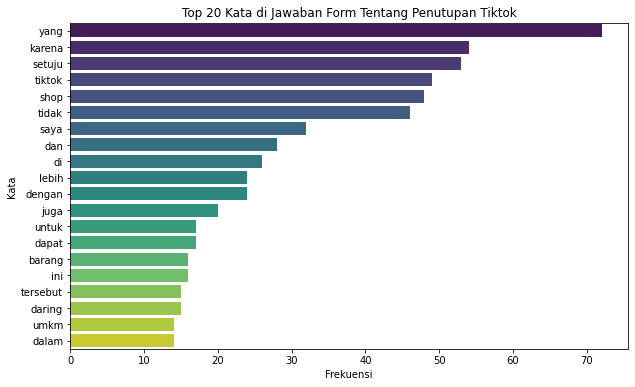

In [68]:
#grafik sebelum penghapusan stopwords
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['tokens_penutupan_tiktok'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Tentang Penutupan Tiktok')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

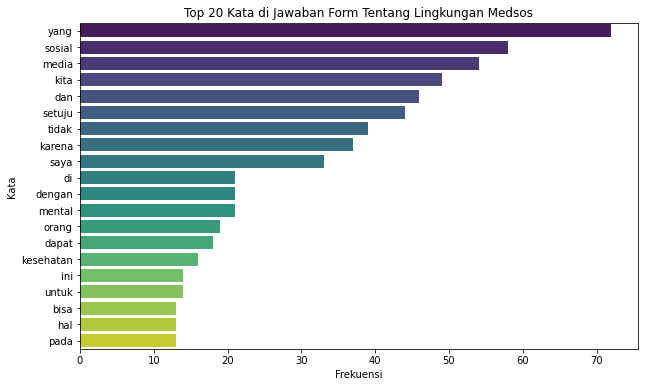

In [69]:
#grafik sebelum penghapusan stopwords
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['tokens_lingkungan_medsos'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Tentang Lingkungan Medsos')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

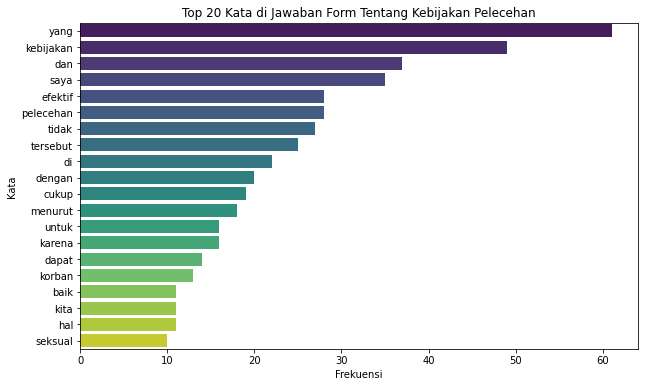

In [70]:
#grafik sebelum penghapusan stopwords
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['tokens_kebijakan_pelecehan'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Tentang Kebijakan Pelecehan')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

### Hilangkan!! stopwords

In [71]:
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('Indonesian'))
    tokens_no_stop = [token for token in tokens if token not in stop_words]
    return tokens_no_stop

dfs['tokens_penutupan_tiktok_stop'] = dfs['tokens_penutupan_tiktok'].apply(remove_stop_words)
dfs['tokens_lingkungan_medsos_stop'] = dfs['tokens_lingkungan_medsos'].apply(remove_stop_words)
dfs['tokens_kebijakan_pelecehan_stop'] = dfs['tokens_kebijakan_pelecehan'].apply(remove_stop_words)

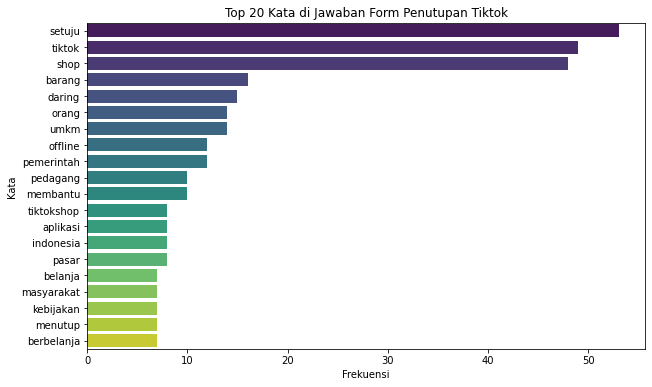

In [72]:
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['tokens_penutupan_tiktok_stop'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Penutupan Tiktok')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

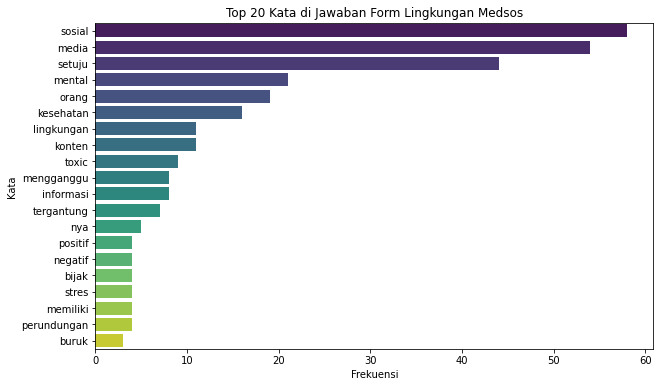

In [73]:
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['tokens_lingkungan_medsos_stop'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Lingkungan Medsos')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

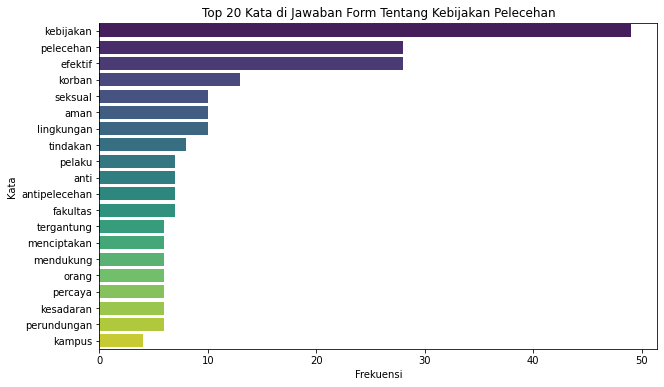

In [74]:
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['tokens_kebijakan_pelecehan_stop'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Tentang Kebijakan Pelecehan')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

#### 1. Penutupan Tiktokshop oleh pemerintah
    bedasarkan grafik, rata2 responden menjawab setuju, namun kita belum bisa menentukan kesimpulan karena masih dalam satu kata, perlu analisis Ngram agar dapat mrlihat pola disekitar kata tersebut

#### 2. Lingkungan Media Sosial Toxic
    bedasarkan grafik, pernyataan setuju terlihat pada urutan ke 3, namun kita masih perlu melakukan pengujian selanjutnya untuk mengetahui pola apa yang sebenarnya terjadi

#### 3. Kebijakan Pelecehan Seksual
    bedasarkan grafik, efektif dan aman muncul dalam deretan atas yang mungkin menjadi titik terang keresahan mahasiswa, namun kita masih perlu melihat pola lebih lanjut untuk mengetahuinya


### Analyze Postag

In [75]:
from nltk.tag import CRFTagger

ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

penutupan_tag = ct.tag_sents(dfs['tokens_penutupan_tiktok_stop'])
lingkungan_tag = ct.tag_sents(dfs['tokens_lingkungan_medsos_stop'])
kebijakan_tag = ct.tag_sents(dfs['tokens_kebijakan_pelecehan_stop'])

In [76]:
dfs['adjectives_penutupan'] = [ [word for word, tag in sent if tag.startswith('JJ')] for sent in penutupan_tag]
dfs['adjectives_lingkungan'] = [ [word for word, tag in sent if tag.startswith('JJ')] for sent in lingkungan_tag]
dfs['adjectives_kebijakan'] = [ [word for word, tag in sent if tag.startswith('JJ')] for sent in kebijakan_tag]

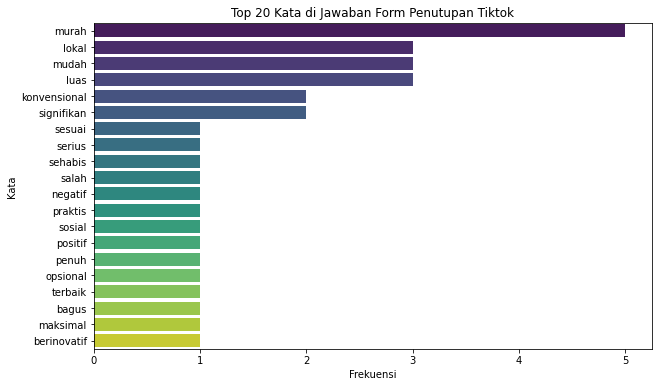

In [77]:
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['adjectives_penutupan'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Penutupan Tiktok')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

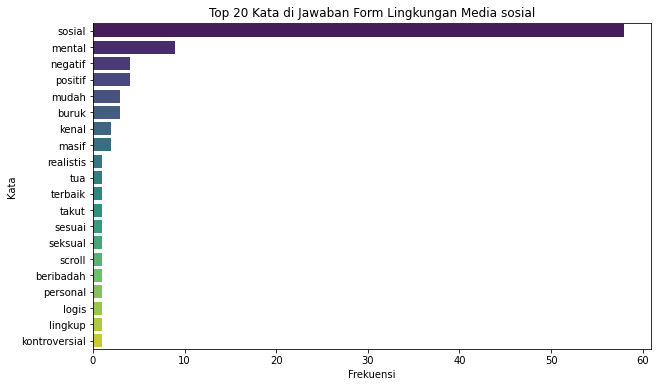

In [78]:
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['adjectives_lingkungan'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Lingkungan Media sosial')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

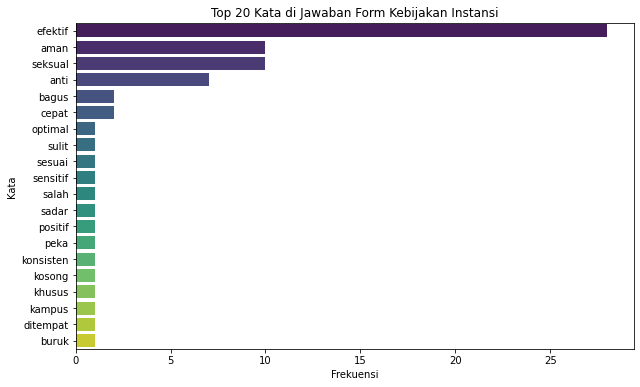

In [79]:
def combine_words(tokens):
    return [word for sublist in tokens for word in sublist]

all_words_peluang = combine_words(dfs['adjectives_kebijakan'])
all_words_peluang_df = pd.DataFrame(all_words_peluang, columns=['word']).value_counts().reset_index(name='count').head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=all_words_peluang_df, palette='viridis')
plt.title('Top 20 Kata di Jawaban Form Kebijakan Instansi')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

#### 1. Penutupan Tiktokshop oleh pemerintah
    Pada anlisis kali ini,topik penutupan tiktok didominasi oleh kata murah,namun kita masih belum bisa mengetahui apakah murah disini adalah pendapat pro atau kontra

#### 2. Lingkungan Media Sosial Toxic
    bedasarkan grafik diatas, kata sifat yang paling banyak dibahas adalah sosial, ini berarti kuisioner pada pertanyaan tersebut paling banyak membahas isu sosial, namun kita erlu melihat lebih dalam apa maksud dari kata tersebut.

#### 3. Kebijakan Pelecehan Seksual
    bedasarkan grafik kata sifat, topik kebijakan di dominasi oleh jawaban efektif, ini memberikan sedikit angin segar bahwa kebijakan instansi memiliki nilai yg efektif jika dilihat melalui sudut pandang grafik tersebut.


### Steamming/Lemmatization

In [70]:
#pip install nlp-id

In [111]:
#pip install Sastrawi

     -------------------------------------- 209.7/209.7 kB 2.1 MB/s eta 0:00:00


In [80]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [81]:
# Ubah lists tokens ke strings
penutupan_text = dfs['tokens_penutupan_tiktok_stop'].apply(lambda x: ' '.join(x))
lingkungan_text = dfs['tokens_lingkungan_medsos_stop'].apply(lambda x: ' '.join(x))
kebijakan_text = dfs['tokens_kebijakan_pelecehan_stop'].apply(lambda x: ' '.join(x))

# Stem teks
stem_penutupan = penutupan_text.apply(stemmer.stem)
stem_lingkungan = lingkungan_text.apply(stemmer.stem)
stem_kebijakan = kebijakan_text.apply(stemmer.stem)

# Tokenisasi teks yang telah di-stem
tokenized_stem_penutupan = stem_penutupan.apply(lambda x: ' '.join([word for word in word_tokenize(x)]))
tokenized_stem_lingkungan = stem_lingkungan.apply(lambda x: ' '.join([word for word in word_tokenize(x)]))
tokenized_stem_kebijakan = stem_kebijakan.apply(lambda x: ' '.join([word for word in word_tokenize(x)]))

# Menambahkan kolom baru ke dalam DataFrame
dfs['tokenized_stem_penutupan'] = tokenized_stem_penutupan.apply(tokenize_text)
dfs['tokenized_stem_lingkungan'] = tokenized_stem_lingkungan.apply(tokenize_text)
dfs['tokenized_stem_kebijakan'] = tokenized_stem_kebijakan.apply(tokenize_text)

In [82]:
dfs.head(1)

,Penutupan TiktokShop,Lingkungan Medsos Toxic,Kebijakan anti-pelecehan,norm_penutupan,norm_lingkungan,norm_kebijakan,no_punctuations_penutupan_tiktok,no_punctuations_lingkungan_medsos,no_punctuations_kebijakan_pelecehan,lowercase_penutupan_tiktok,...,tokens_kebijakan_pelecehan,tokens_penutupan_tiktok_stop,tokens_lingkungan_medsos_stop,tokens_kebijakan_pelecehan_stop,adjectives_penutupan,adjectives_lingkungan,adjectives_kebijakan,tokenized_stem_penutupan,tokenized_stem_lingkungan,tokenized_stem_kebijakan
0,"kurang setuju, karena menurut saya belanja di ...","saya setuju dengan pendapat tersebut, karena j...",sebagai manusia yang bermoral dan berakhlak te...,kurang setuju karena menurut saya belanja di t...,saya setuju dengan pendapat tersebut karena ji...,sebagai manusia yang bermoral dan berakhlak te...,kurang setuju karena menurut saya belanja di t...,saya setuju dengan pendapat tersebut karena ji...,sebagai manusia yang bermoral dan berakhlak te...,kurang setuju karena menurut saya belanja di t...,...,"[sebagai, manusia, yang, bermoral, dan, berakh...","[setuju, belanja, tiktok, shop, mudah, barangb...","[setuju, pendapat, kenyataannya, orangorang, m...","[manusia, bermoral, berakhlak, mengerti, paham...","[mudah, murah, bagus]","[sosial, sosial]","[bermoral, salah, seksual, seksual, bagus, sek...","[tuju, belanja, tiktok, shop, mudah, barangbar...","[tuju, dapat, nyata, orangorang, media, sosial...","[manusia, moral, akhlak, erti, paham, kait, pe..."


### Ngram

In [83]:
# membuat analisis Ngram
def extract_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    n_gram_list = [' '.join(gram) for gram in n_grams]
    return n_gram_list

# membuat bigrams
dfs['token_ngram_penutupan'] = dfs['tokens_penutupan_tiktok_stop'].apply(lambda x: extract_ngrams(x, 2))
dfs['token_ngram_lingkungan'] = dfs['tokens_lingkungan_medsos_stop'].apply(lambda x: extract_ngrams(x, 2))
dfs['token_ngram_kebijakan'] = dfs['tokens_kebijakan_pelecehan_stop'].apply(lambda x: extract_ngrams(x, 2))

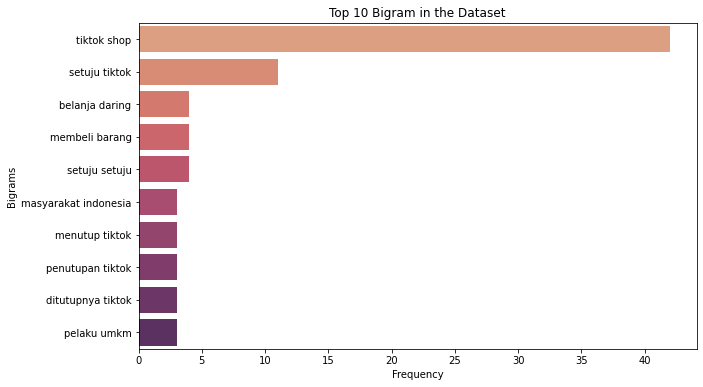

In [84]:
Ngram_comb = combine_words(dfs['token_ngram_penutupan'])
top_bigrams_df = pd.DataFrame(Ngram_comb, columns=['word']).value_counts().reset_index(name='count').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_bigrams_df, palette='flare')
plt.title('Top 10 Bigram in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

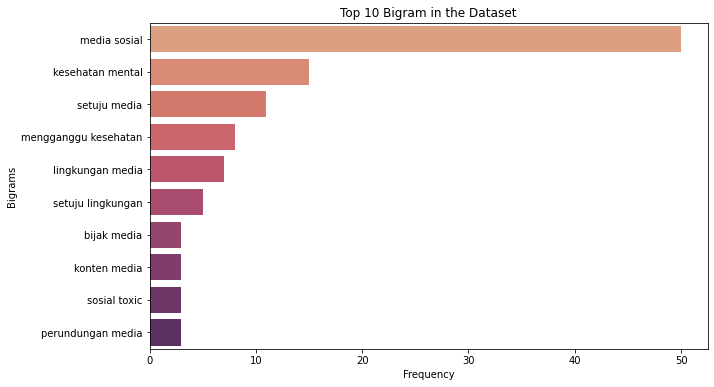

In [85]:
Ngram_comb = combine_words(dfs['token_ngram_lingkungan'])
top_bigrams_df = pd.DataFrame(Ngram_comb, columns=['word']).value_counts().reset_index(name='count').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_bigrams_df, palette='flare')
plt.title('Top 10 Bigram in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

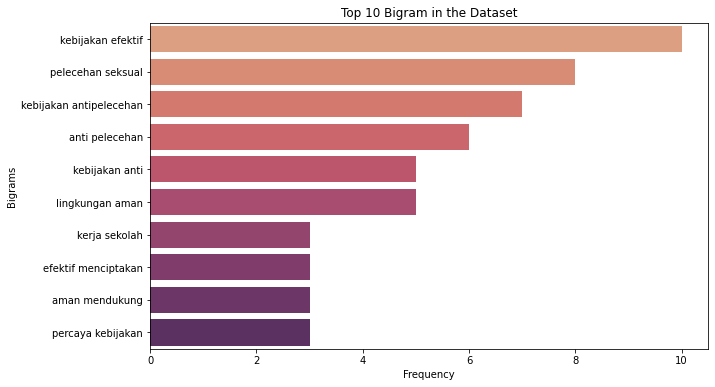

In [86]:
Ngram_comb = combine_words(dfs['token_ngram_kebijakan'])
top_bigrams_df = pd.DataFrame(Ngram_comb, columns=['word']).value_counts().reset_index(name='count').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_bigrams_df, palette='flare')
plt.title('Top 10 Bigram in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

# Data Labeling

Kuisioner masih belum mempunyai sentimen sehingga sulit untuk mencari tahu apakah pengguna memberikan ulasan positif atau negatif. Proses pemberian sentimen tidak mungkin dilakukan secara manual dengan melihat ulasan secara satu per satu karena membutuhkan waktu yang lama dan memerlukan seorang ahli di bidang bahasa yang dapat menafsirkan ulasan kemudian mengelompokkan ke sentimen positif dan negatif. Maka dari itu, saya melakukan proses pemberian label sentimen dengan menerapkan metode yang berbasis lexicon atau biasa dikenal dengan lexicon-based method. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.

saya mendownloadnya menggunakan link berikut

#### Positif
    https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

#### Negatif
    https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

In [87]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

Ulasan diberi score terlebih dahulu dengan menyesuaikan dengan bobot kata yang terdapat di kamus. +5 untuk kata positif dan -5 untuk negatif. Setelah itu, bobot ulasan dijumlahkan kemudian di kelompokkan menjadi sentimen positif, negatif, dan netral. netral ini diartikan sebagai hasil kalkulasi ulasan bernilai 0. Karena fokus analisis ini hanya sentimen positif dan negatif, maka ulasan yang mengandung sentimen netral nanti akan di hilangkan.

In [88]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'
  
  return score, polarity

In [89]:
# melakukan test menggunakan kalimat dummy
string = "ini  bermanfaat"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil 

(5, 'positif')

In [90]:
penutupan_sentimendf = dfs.copy()
lingkungan_sentimendf = dfs.copy()
kebijakan_sentimendf = dfs.copy()

penutupan_sentimendf = penutupan_sentimendf.loc[:, ['tokenized_stem_penutupan']]
lingkungan_sentimendf = lingkungan_sentimendf.loc[:, ['tokenized_stem_lingkungan']]
kebijakan_sentimendf = kebijakan_sentimendf.loc[:, ['tokenized_stem_kebijakan']]

penutupan_sentimendf['sentence'] = penutupan_sentimendf['tokenized_stem_penutupan'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
lingkungan_sentimendf['sentence'] = lingkungan_sentimendf['tokenized_stem_lingkungan'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
kebijakan_sentimendf['sentence'] = kebijakan_sentimendf['tokenized_stem_kebijakan'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

In [91]:
kebijakan_sentimendf.head(1)

,tokenized_stem_kebijakan,sentence
0,"[manusia, moral, akhlak, erti, paham, kait, pe...",manusia moral akhlak erti paham kait perbuatan...


In [92]:
penutupan_sentimendf['prepos_text'] = penutupan_sentimendf.sentence.str.split()
lingkungan_sentimendf['prepos_text'] = lingkungan_sentimendf.sentence.str.split()
kebijakan_sentimendf['prepos_text'] = kebijakan_sentimendf.sentence.str.split()

In [93]:
penutupan_sentimendf['prepos_text'] = penutupan_sentimendf['sentence'].apply(lambda x: x.split() if isinstance(x, str) else [])
lingkungan_sentimendf['prepos_text'] = lingkungan_sentimendf['sentence'].apply(lambda x: x.split() if isinstance(x, str) else [])
kebijakan_sentimendf['prepos_text'] = kebijakan_sentimendf['sentence'].apply(lambda x: x.split() if isinstance(x, str) else [])

In [94]:
penutupan_sentimendf

,tokenized_stem_penutupan,sentence,prepos_text
0,"[tuju, belanja, tiktok, shop, mudah, barangbar...",tuju belanja tiktok shop mudah barangbarang ju...,"[tuju, belanja, tiktok, shop, mudah, barangbar..."
1,"[tuju, tiktok, shop, pengaruh, dagang, jual, t...",tuju tiktok shop pengaruh dagang jual tik tok ...,"[tuju, tiktok, shop, pengaruh, dagang, jual, t..."
2,"[tuju, sumber, hasil]",tuju sumber hasil,"[tuju, sumber, hasil]"
3,"[tuju, tuju, tiktok, shop, orang, orang, cari,...",tuju tuju tiktok shop orang orang cari uang or...,"[tuju, tuju, tiktok, shop, orang, orang, cari,..."
4,"[tuju, tiktok, shop, bantu, laku, produk, umkm...",tuju tiktok shop bantu laku produk umkm kenal ...,"[tuju, tiktok, shop, bantu, laku, produk, umkm..."
5,"[tuju, ilah, batas, maksimal, jual, minggu, da...",tuju ilah batas maksimal jual minggu dagang pa...,"[tuju, ilah, batas, maksimal, jual, minggu, da..."
6,"[tuju, daring, store, banyak, jual, barang, mu...",tuju daring store banyak jual barang murah off...,"[tuju, daring, store, banyak, jual, barang, mu..."
7,"[tuju, bijak, umkm, kembang, tiktok, tutup]",tuju bijak umkm kembang tiktok tutup,"[tuju, bijak, umkm, kembang, tiktok, tutup]"
8,"[tiktok, shop, baik2]",tiktok shop baik2,"[tiktok, shop, baik2]"
9,"[tuju, orang, malas, pergi, temu, orang, berat...",tuju orang malas pergi temu orang berat luang ...,"[tuju, orang, malas, pergi, temu, orang, berat..."


In [95]:
results = penutupan_sentimendf['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
penutupan_sentimendf['polarity_score'] = results[0]
penutupan_sentimendf['polarity'] = results[1]
print(penutupan_sentimendf['polarity'].value_counts())

negatif    31
positif    14
netral      7
Name: polarity, dtype: int64


In [96]:
results = lingkungan_sentimendf['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
lingkungan_sentimendf['polarity_score'] = results[0]
lingkungan_sentimendf['polarity'] = results[1]
print(lingkungan_sentimendf['polarity'].value_counts())

negatif    28
positif    24
Name: polarity, dtype: int64


In [97]:
results = kebijakan_sentimendf['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
kebijakan_sentimendf['polarity_score'] = results[0]
kebijakan_sentimendf['polarity'] = results[1]
print(kebijakan_sentimendf['polarity'].value_counts())

negatif    31
positif    19
netral      2
Name: polarity, dtype: int64


In [98]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
penutupan_sentimendf = penutupan_sentimendf.drop(penutupan_sentimendf[penutupan_sentimendf['polarity'] == 'netral'].index)
penutupan_sentimendf = penutupan_sentimendf.reset_index(drop=True)

kebijakan_sentimendf = kebijakan_sentimendf.drop(kebijakan_sentimendf[kebijakan_sentimendf['polarity'] == 'netral'].index)
kebijakan_sentimendf = kebijakan_sentimendf.reset_index(drop=True)

### visualisasi sentimen

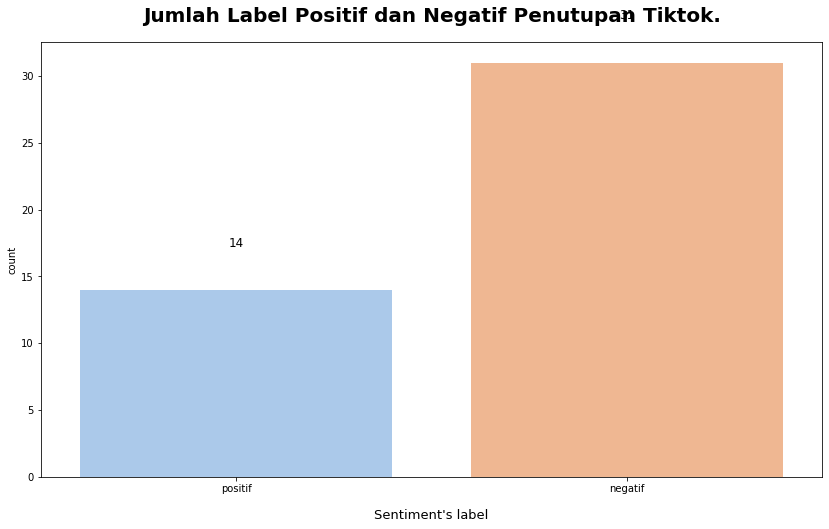

In [99]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=penutupan_sentimendf, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif Penutupan Tiktok.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

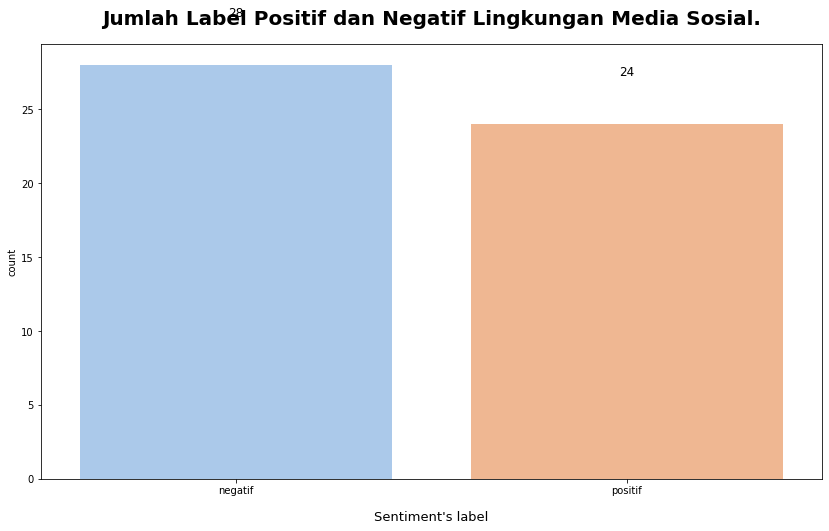

In [100]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=lingkungan_sentimendf, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif Lingkungan Media Sosial.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

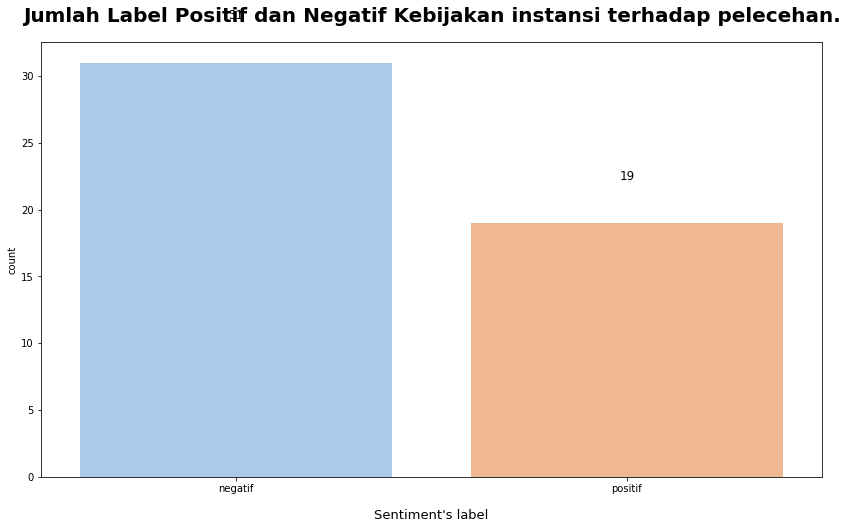

In [101]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=kebijakan_sentimendf, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif Kebijakan instansi terhadap pelecehan.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()